In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('../data/Employers_data.csv')
print(df.head())
print(df.info())

   Employee_ID            Name  Age  Gender   Department  Job_Title  \
0            1    Merle Ingram   24  Female  Engineering   Engineer   
1            2      John Mayes   56    Male        Sales  Executive   
2            3    Carlos Wille   21    Male  Engineering     Intern   
3            4  Michael Bryant   30    Male      Finance    Analyst   
4            5   Paula Douglas   25  Female           HR    Analyst   

   Experience_Years Education_Level  Location  Salary  
0                 1          Master    Austin   90000  
1                33          Master   Seattle  195000  
2                 1        Bachelor  New York   35000  
3                 9        Bachelor  New York   75000  
4                 2          Master   Seattle   70000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null

In [70]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Employee_ID         0
Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64


In [71]:
#average salary for each department
avg_salary_by_dept = df.groupby("Department")["Salary"].mean()
print(avg_salary_by_dept)

Department
Engineering     90680.332739
Finance        130376.175549
HR             126400.602410
Marketing      101734.571600
Product        116676.334107
Sales          127309.766327
Name: Salary, dtype: float64


In [72]:
#the number of employees by gender
gender_dist = df["Gender"].value_counts()
print(gender_dist)

Gender
Male      5108
Female    4892
Name: count, dtype: int64


In [73]:
#average salary for each education level
avg_salary_by_edu = df.groupby("Education_Level")["Salary"].mean()
print(avg_salary_by_edu)

Education_Level
Bachelor     69529.724933
Master      134234.279919
PhD         152137.359384
Name: Salary, dtype: float64


In [74]:
#the total years of experience per job title
total_exp_by_job = df.groupby("Job_Title")["Experience_Years"].sum()
print(total_exp_by_job.head())

Job_Title
Analyst      12769
Engineer     12515
Executive    44438
Intern         301
Manager      53686
Name: Experience_Years, dtype: int64


In [75]:
#the top 5 locations with highest average salaries
top_salary_locations = df.groupby("Location")["Salary"].mean().nlargest(5)
print(top_salary_locations)

Location
New York         116648.989899
San Francisco    116613.972463
Seattle          115708.973723
Chicago          114569.223108
Austin           113436.578171
Name: Salary, dtype: float64


In [76]:
#Explore how experience affects salary
exp_vs_salary = df.groupby("Experience_Years")["Salary"].mean()
print(exp_vs_salary.head())

Experience_Years
0    46888.619855
1    53622.448980
2    69503.816794
3    73861.607143
4    76241.457859
Name: Salary, dtype: float64


In [77]:
#the number of employees in each department
dept_count = df["Department"].value_counts()
print(dept_count)

Department
Product        1724
Engineering    1683
Sales          1669
Marketing      1669
HR             1660
Finance        1595
Name: count, dtype: int64


In [78]:
#average age by gender
avg_age_by_gender = df.groupby("Gender")["Age"].mean()
print(avg_age_by_gender)

Gender
Female    35.300286
Male      35.604933
Name: Age, dtype: float64


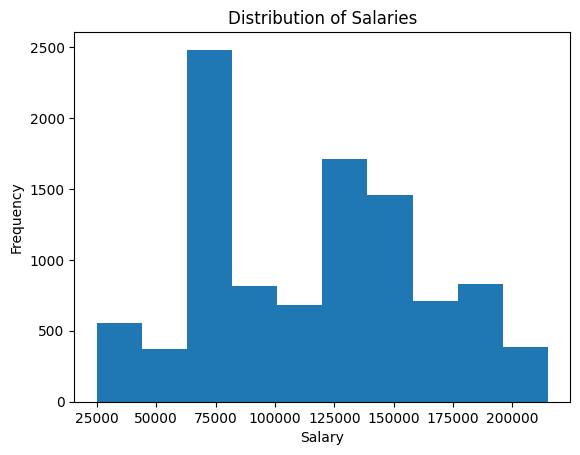

In [79]:
df["Salary"].plot(kind="hist")
plt.title("Distribution of Salaries")
plt.xlabel("Salary")
plt.show()

In [80]:
#the top 5 jobs with the highest average salaries
top_jobs_by_salary = df.groupby("Job_Title")["Salary"].mean().nlargest(5)
print(top_jobs_by_salary)

Job_Title
Executive    183414.888079
Manager      135260.150376
Engineer      99272.727273
Analyst       69478.385138
Intern        35801.724138
Name: Salary, dtype: float64


In [81]:
#the percentage of male employees earning above $100K
high_salary_by_gender = len(df[(df["Salary"] > 100000) & (df["Gender"] == "Male")]) / len(df[df["Gender"] == "Male"]) * 100
print(f"Percentage of Male High Salaries: {high_salary_by_gender:.2f}%")

Percentage of Male High Salaries: 58.36%


In [82]:
#Average years of experience by location
loc_vs_exp = df.groupby("Location")["Experience_Years"].mean()
print(loc_vs_exp.head())

Location
Austin           12.063913
Chicago          12.144920
New York         12.635354
San Francisco    12.642529
Seattle          12.381755
Name: Experience_Years, dtype: float64


In [83]:
#the employees with higher education (Master's or PhD)
high_edu_count = len(df[df["Education_Level"].isin(["Master", "PhD"])])
print(f"Employees with Master/PhD: {high_edu_count}")

Employees with Master/PhD: 6619


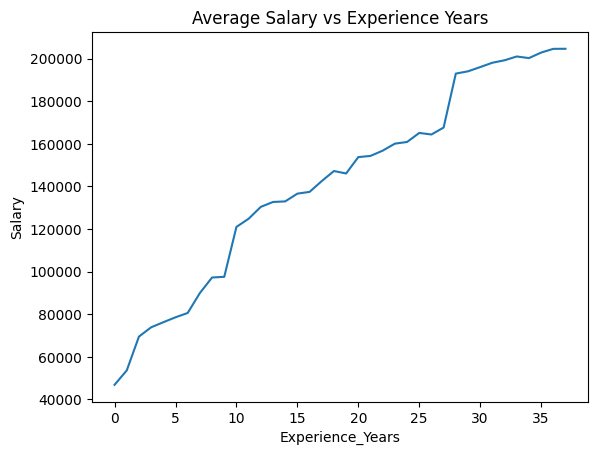

In [84]:
df.groupby("Experience_Years")["Salary"].mean().plot(kind="line")
plt.title("Average Salary vs Experience Years")
plt.ylabel("Salary")
plt.show()

In [85]:
#Compare salaries between genders in the engineering department
gender_vs_salary_eng = df[df["Department"] == "Engineering"].groupby("Gender")["Salary"].mean()
print(gender_vs_salary_eng)

Gender
Female    89175.500589
Male      92212.230216
Name: Salary, dtype: float64


In [86]:
#Total salary expense by location
total_salary_by_loc = df.groupby("Location")["Salary"].sum()
print(total_salary_by_loc.head())

Location
Austin           230730000
Chicago          230055000
New York         230965000
San Francisco    228680000
Seattle          233385000
Name: Salary, dtype: int64


In [87]:
#the top 10 employees with the highest salaries
top_employees = df.nlargest(10, "Salary")[["Name", "Salary"]]
print(top_employees)

                   Name  Salary
2132        Mark Newman  215000
3949      Willis Holmes  215000
9423  Alexander Compton  215000
231         Albert Ness  210000
369     Shaun Bernhardt  210000
1350       Derrick Gunn  210000
1667        Debra Locks  210000
1720       Willie Bruce  210000
1772         Kevin Best  210000
1783      Heather Himes  210000


In [88]:
#how salary levels are spread within each education category
salary_by_edu_dist = df.groupby("Education_Level")["Salary"].value_counts()
print(salary_by_edu_dist.head())

Education_Level  Salary
Bachelor         70000     622
                 65000     560
                 75000     412
                 35000     262
                 60000     260
Name: count, dtype: int64


In [89]:
#which jobs require or attract more experienced staff.
exp_by_job = df.groupby("Job_Title")["Experience_Years"].mean()
print(exp_by_job.head())

Job_Title
Analyst       4.561986
Engineer      9.101818
Executive    23.132743
Intern        0.518966
Manager      16.146165
Name: Experience_Years, dtype: float64


In [90]:
#Average salary by age in the sales department
age_vs_salary_sales = df[df["Department"] == "Sales"].groupby("Age")["Salary"].mean()
print(age_vs_salary_sales.head())

Age
22    62638.888889
23    64646.464646
24    66090.909091
25    66947.368421
26    68494.623656
Name: Salary, dtype: float64


In [91]:
#the employees with salaries below $50,000
high_salary_by_loc = len(df[(df["Salary"] > 100000) & (df["Location"] == "New York")]) / len(df[df["Location"] == "New York"]) * 100
print(f"Percentage of High Salaries in New York: {high_salary_by_loc:.2f}%")

Percentage of High Salaries in New York: 58.89%


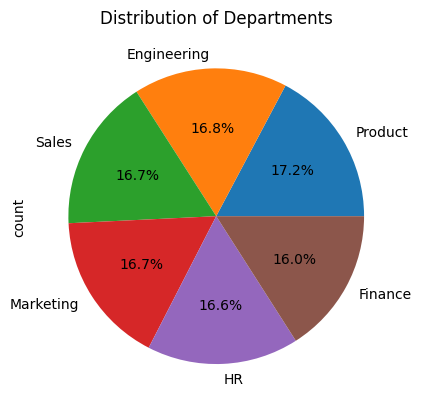

In [92]:
df["Department"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Departments")
plt.show()

In [93]:
#Average salary by gender
salary_by_gender = df.groupby("Gender")["Salary"].mean()
print(salary_by_gender)

Gender
Female    114567.661488
Male      116160.924041
Name: Salary, dtype: float64


In [94]:
#how education level correlates with years of experience.
edu_vs_exp = df.groupby("Education_Level")["Experience_Years"].mean()
print(edu_vs_exp)

Education_Level
Bachelor     5.332150
Master      15.961460
PhD         15.980462
Name: Experience_Years, dtype: float64


In [95]:
#total employees per job title
total_employees_by_job = df.groupby("Job_Title")["Employee_ID"].count()
print(total_employees_by_job.head())

Job_Title
Analyst      2799
Engineer     1375
Executive    1921
Intern        580
Manager      3325
Name: Employee_ID, dtype: int64


In [96]:
#top 5 departments with highest average experience
top_dept_by_exp = df.groupby("Department")["Experience_Years"].mean().nlargest(5)
print(top_dept_by_exp)

Department
Finance      14.815674
HR           14.123494
Sales        13.966447
Product      12.521462
Marketing    10.249850
Name: Experience_Years, dtype: float64


In [97]:
#Average salary by age group (binned)
age_bins = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60])
salary_by_age = df.groupby(age_bins, observed=False)["Salary"].mean()
print(salary_by_age)

Age
(20, 30]     69503.992257
(30, 40]    127396.096856
(40, 50]    155813.163482
(50, 60]    197463.087248
Name: Salary, dtype: float64


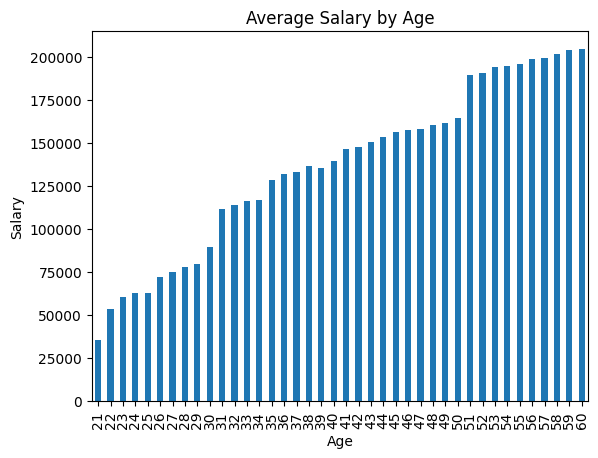

In [98]:
df.groupby("Age")["Salary"].mean().plot(kind="bar")
plt.title("Average Salary by Age")
plt.ylabel("Salary")
plt.show()

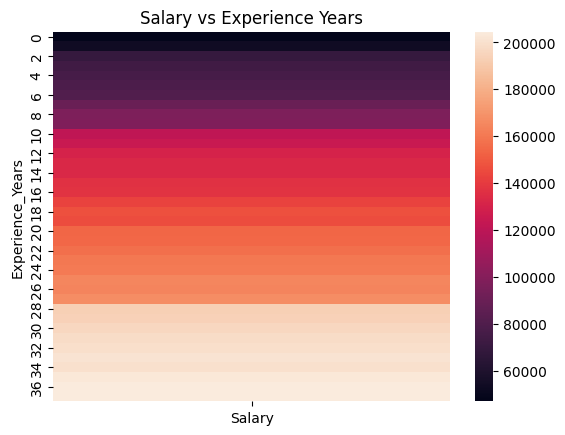

In [99]:
pivot = df.pivot_table(values="Salary", index="Experience_Years", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Salary vs Experience Years")
plt.show()